In [1]:
import numpy as np
import pandas as pd

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [3]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [4]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [5]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [6]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)

In [7]:
from sklearn.model_selection import train_test_split, KFold

In [8]:
n_splits = 10


In [9]:
from common import compute_rmse

In [10]:
out = {}
for scale in [1, 5, 10, 20]:
    out[scale] = {}
    for random_seed in range(5):
        print (scale, random_seed)
        
        
        
        tensor_copy = tensor.copy()
        ################# PLEASE SEE THE LINE BELOW- CHANGED FROM learn_HAT to learn_HAT_random_normal #######
        H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_random_normal(case, tensor_copy, a, 2, num_iter=12000, lr=0.1, dis=True, cost_function=cost, T_known=np.ones(12).reshape(-1, 1), random_seed=random_seed, scale_random=scale)
        out[scale][random_seed] = {'Hs':Hs, 'As':As, 'Ts':Ts, 'HATs':HATs, 'costs':costs}

1 0
215.619685111
39.8724755307
39.5557436005
39.1049092987
38.2913103237
36.4564857291
33.0038214581
31.0205752814
30.7441390501
30.7216235237
30.7160904181
30.7135304009
30.7121870055
30.7114730229
30.7110890524
30.7108759133
30.7107506377
30.7106700626
30.7106127574
30.7105680919
30.7105307274
30.7104979302
30.7104682577
30.7104409151
1 1
215.989603818
39.9513249611
39.6209466838
39.1873867745
38.4251272172
36.7395916078
33.3637273769
31.1284597311
30.7545094332
30.7238084806
30.7172025681
30.714245926
30.7126966984
30.7118697845
30.7114235172
30.7111754543
30.7110278595
30.7109312608
30.7108610337
30.710804916
30.7107567808
30.7107135428
30.7106736257
30.7106362031
1 2
215.571740506
39.9435569013
39.6391741112
39.2464917595
38.606157777
37.2721097914
34.0665126084
31.2011090948
30.746280061
30.7194208864
30.7146906908
30.712730836
30.7117723593
30.711288658
30.7110356589
30.7108941247
30.7108064666
30.710745228
30.7106974084
30.7106568527
30.7106206236
30.710587293
30.7105561411
30

In [57]:
from plot_functions import *

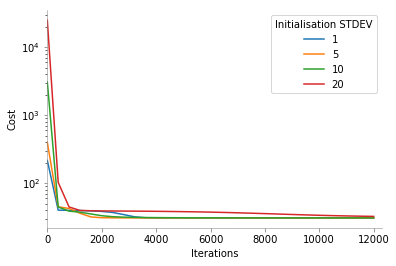

In [59]:
random_seed=0
step=400
fig, ax  =plt.subplots()
for scale in [1, 5, 10, 20]:

    tdf = pd.DataFrame({scale:out[scale][0]['costs'][::step]}, index=range(len(out[scale][0]['costs']))[::step])
    tdf.plot(logy=True, ax=ax)
plt.xlim((-10, 12300))
plt.legend(title='Initialisation STDEV')
format_axes(ax)
plt.xlabel("Iterations")
plt.ylabel("Cost")

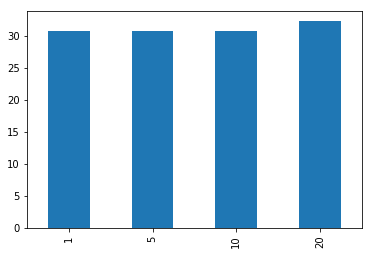

In [79]:
random_seed=0
step=400
fig, ax  =plt.subplots()
c = {}
for scale in [1, 5, 10, 20]:

    c[scale] = out[scale][0]['costs'][12000]
pd.Series(c).plot(kind='bar')